<a href="https://colab.research.google.com/github/daustin1/355-Team-1-GOL/blob/master/10_20Att1_SMOTE_RFTestedwGenData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#References
#-------------------------------------------------------
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#https://www.kaggle.com/dansbecker/underfitting-and-overfitting
#https://towardsdatascience.com/precision-vs-recall-386cf9f89488
#https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
#https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
#https://www.geeksforgeeks.org/best-python-libraries-for-machine-learning/
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#http://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#https://datascience.stackexchange.com/questions/47228/using-smote-for-synthetic-data-generation-to-improve-performance-on-unbalanced-d
#https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
#https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

#-------------------------------------------------------
#Title: RF Scaled and Balanced w/ Synthetic Data Gen
#Author: David Austin
#Purpose: Thesis Work
#Created: Oct 7, 2019
#Revised: Oct 20,2019
#Advisor: Dr. Hong Liu
#-------------------------------------------------------

In [0]:
import numpy as np
import pandas as pd
from numpy import loadtxt

from numpy import array

import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, roc_curve, confusion_matrix, accuracy_score,precision_recall_curve,f1_score

from imblearn.over_sampling import SMOTE

In [0]:
#import pandas as pd
#import math
#import numpy as np
#from sklearn.metrics import auc, roc_curve, confusion_matrix, accuracy_score,precision_recall_curve,f1_score
#import matplotlib.pyplot as plt
#import random
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#import missingno

In [0]:
#pip install -U imbalanced-learn

Read in file

In [27]:
#Read in csv, set up x and y variables
#-------------------------------------------------------
#Read in Data (CSV)
fi = pd.read_csv("/Untitled Folder/nonclean0627_unCondAllCA1S1.csv")
fi.head(6)


,type,sendTime,sender,messageID,pos_0,pos_1,spd_0,spd_1,receiver,AttackType,MLPrediction
0,3,25200.00936,85,2081,3594.664563,5665.135272,1.365599,-31.771078,7,0,0
1,3,25200.02011,91,2452,3597.065839,5626.300132,2.669000,-31.706486,7,0,0
2,3,25200.03066,931,3619,3589.664305,5703.861398,-1.355341,32.461479,7,0,0
3,3,25200.04402,961,4645,3631.304771,5229.921448,-4.466323,28.634010,7,0,0
4,3,25200.06986,313,7676,5560.000000,5820.000000,-0.019531,-33.487743,7,1,0
5,3,25200.24980,109,13575,3600.326908,5686.981738,1.289000,-30.043390,7,0,0


In [28]:
#Create copy of original data without extra columns
modFi = fi.drop(columns=['type','sendTime','messageID','MLPrediction','sender','receiver'])
#Setup x and y variables (Features vs target)
y=fi['AttackType']
#Drop un-necessary features from X
x=fi.drop(columns=['type','sendTime','messageID','AttackType','MLPrediction','sender','receiver'])
#Display first six values in x
x.head(6)

,pos_0,pos_1,spd_0,spd_1
0,3594.664563,5665.135272,1.365599,-31.771078
1,3597.065839,5626.300132,2.669000,-31.706486
2,3589.664305,5703.861398,-1.355341,32.461479
3,3631.304771,5229.921448,-4.466323,28.634010
4,5560.000000,5820.000000,-0.019531,-33.487743
5,3600.326908,5686.981738,1.289000,-30.043390


In [29]:
#Display first six values in y
y.head(6)

0    0
1    0
2    0
3    0
4    1
5    0
Name: AttackType, dtype: int64

0    453692
1     47142
Name: AttackType, dtype: int64

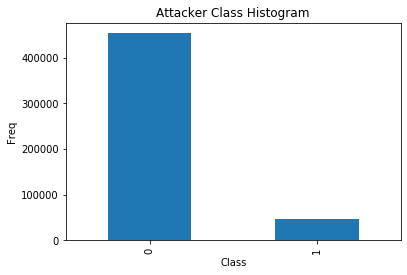

In [30]:
#Visualize the Amount of Score (1) vs (0)
#-------------------------------------------------------

pd.value_counts(fi['AttackType']).plot.bar()
plt.title('Attacker Class Histogram')
plt.xlabel('Class')
plt.ylabel('Freq')
fi['AttackType'].value_counts()

In [31]:
(47142/(453592+47142))*100

9.414579397444552

Split the data

In [0]:
#Import the correct method 
#-------------------------------------------------------
from sklearn.model_selection import train_test_split
#Split the data into test and training. Do a 70% training and 30% testing. Split values as are in dataset (stratify)
#-------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=42,stratify=y,shuffle=True)

In [33]:
#Visualize shape of training vs testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350583, 4) (150251, 4) (350583,) (150251,)


To Ensure Proper Training. Must only SMOTE on Training data


In [0]:
#SMOTE Library is used to balance the classes (It will Generate Synthetic Data for Miniority Class)

#Import the SMOTE library
from imblearn.over_sampling import SMOTE
#Instntialize a SMOTE variable, with a set random_state and ratio
sm = SMOTE(random_state=27,ratio=1.0)

In [0]:
#Sample x and y, Generate Synthetic data to balance the data
synX_train,syny_train = sm.fit_sample(X_train,y_train)

In [0]:
#Instantiate MinMaxScaler variable, and fit/transform to x
#-------------------------------------------------------
scaler =  MinMaxScaler(feature_range=(0, 1))
scalX_train = scaler.fit_transform(synX_train)

In [37]:
scalX_train.shape

(635168, 4)

In [38]:
syny_train.value_count()

AttributeError: ignored

In [0]:
#Visualize the Amount of Score (1) vs (0)
#-------------------------------------------------------

#d.value_counts(syny_train.plot.bar())
plt.title('Attacker Class Histogram')
plt.xlabel('Class')
plt.ylabel('Freq')
syny_train.value_counts()

*Fit* Data using Random Forest (RF)


In [39]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(scalX_train,syny_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#To Verify Test Data, must tranform with same scaling as training used
#-----------------------------------------------------------

scalX_test = scaler.transform(X_test)

y_pred = rf.predict(scalX_test)


In [41]:
#Print Confusion Matrix of Data 
#-----------------------------------------------------------

print(confusion_matrix(y_test, y_pred))

[[136108      0]
 [     0  14143]]


In [42]:
#The classification report shows the precision, recall, f1 score and accuracy of the model and each output case
#-----------------------------------------------------------

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136108
           1       1.00      1.00      1.00     14143

    accuracy                           1.00    150251
   macro avg       1.00      1.00      1.00    150251
weighted avg       1.00      1.00      1.00    150251



In [43]:
print(threshold)

NameError: ignored

Plot ROC

Testing data AUC:  1.0


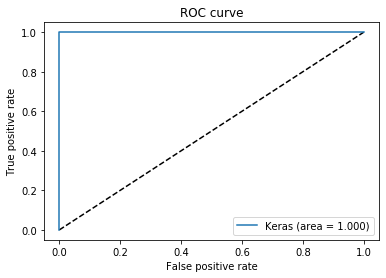

<Figure size 432x288 with 0 Axes>

In [44]:
#Ref: 
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#-----------------------------------------------------------
#ROC Curve
# AUC score of testing data
#-----------------------------------------------------------

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.savefig("/Untitled Folder/10_20Att1SmRF_ROC.png")

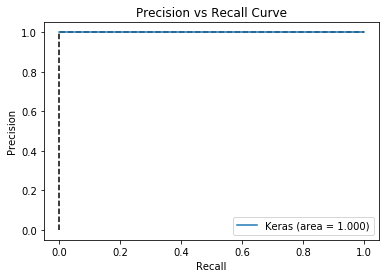

<Figure size 432x288 with 0 Axes>

In [45]:
#Ref: 
#https://github.com/antaloaalonso/Classification-Model-YT-Video/blob/master/Classification%20Model%20on%20breast%20cancer%20Dataset.ipynb
#-----------------------------------------------------------
#Precision and Recall Curve
#-----------------------------------------------------------

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(1)
plt.plot([0, 0,1], [0, 1,1], 'k--')
plt.plot(recall, precision, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall Curve')
plt.legend(loc='best')
plt.show()
plt.savefig('/Untitled Folder/10_20Att1SmRF_PRRCurve.png')

In [46]:
print(np.unique(y_pred))

[0 1]


In [0]:
#Random Walk Gen Data, Portions of Data are Full Attacker, and Mix of Non/Attacker

myattgen = (
[[4775.132499,5445.641949,10.87395897,-4.847415153],
[4790.192406,5409.415755,15.05990719,-36.22619371],
[4798.125061,5407.291785,7.932654371,-2.123970556],
[4811.940337,5438.689691,13.81527643,31.39790642],
[4776.679244,5513.197713,-35.26109297,74.50802142],
[4799.305531,5445.39514,22.62628675,-67.80257296],
[4772.065971,5470.691049,-27.2395596,25.29590906],
[4800.96704,5487.22975,28.90106844,16.5387017],
[4793.512779,5418.56589,-7.454260837,-68.66386064],
[4837.842046,5423.287689,44.32926727,4.721799534],
[3135.40644,5520.474623,3.980824232,4.222973833],
[3150.466347,5556.700817,15.05990719,36.22619371],
[3158.399001,5558.824787,7.932654371,2.123970556],
[3172.214278,5527.426881,13.81527643,-31.39790642],
[3136.953185,5588.030387,-35.26109297,60.60350574],
[3111.233408,5520.721433,-25.71977679,-67.30895421],
[3132.339912,5545.523723,21.10650394,24.80229031],
[3109.571899,5562.062425,-22.76801277,16.5387017],
[3153.78672,5493.398564,44.21482038,-68.66386064],
[3198.115987,5542.828883,44.32926727,49.43031897],
[5560,5849.761829,5.591604024,-4.817498439],
[5560,5856.226194,15.26770016,6.464364316],
[5560,5858.350164,2.094458262,2.123970556],
[5560,5826.952258,0.174107488,-31.39790642],
[5560,5887.555764,-5.238442488,60.60350574],
[5560,5820.246809,2.132500497,-67.30895421],
[5560,5845.0491,8.982450752,24.80229031],
[5560,5861.587801,5.65830739,16.5387017],
[5560,5792.923941,3.352828511,-68.66386064],
[5560,5842.35426,0.51157693,49.43031897],
[5544.050287,5820,3.058531343,-20.6133566],
[5575.059907,5820,31.00961983,2.72566848],
[5582.992562,5820,7.932654371,7.824998019],
[5596.807838,5820,13.81527643,-8.794052134],
[5561.546745,5820,-35.26109297,54.63051091],
[5535.826968,5820,-25.71977679,47.49808619],
[5556.933472,5820,21.10650394,7.395275093],
[5534.165459,5820,-22.76801277,6.545444849],
[5578.38028,5820,44.21482038,1.439112293],
[5622.709547,5820,44.32926727,2.064427141],
[5575.949713,5849.761829,-3.0984563,6.561352962],
[5575.059907,5783.773806,-0.889805445,-65.9880231],
[5582.992562,5781.649836,7.932654371,-2.123970556],
[5596.807838,5813.047742,13.81527643,31.39790642],
[5561.546745,5887.555764,-35.26109297,74.50802142],
[5584.173032,5819.753191,22.62628675,-67.80257296],
[5556.933472,5845.0491,-27.2395596,25.29590906],
[5585.834541,5861.587801,28.90106844,16.5387017],
[5578.38028,5792.923941,-7.454260837,-68.66386064],
[5622.709547,5797.64574,44.32926727,4.721799534]]


)

In [54]:
#Scale the generated data by transforming the scaler previously used on the train/test data. Predict the output classes
scalattGen = scaler.transform(myattgen)
#arrscalGen = scalattGen.reshape(scalattGen.shape[0],1,scalattGen.shape[1])
attPred = rf.predict(scalattGen)
attPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [0]:
ymy = (
[[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1]]
)

In [56]:
print(confusion_matrix(ymy, attPred))


[[19  0]
 [21 10]]


In [0]:
attGen = ([[4907.791784,5815.908848,-3.99249041,-7.160605538],
[4997.83084,5820.767765,90.03905587,4.858916821],
[4897.988531,5808.056047,-99.84230924,-12.71171758],
[4953.268524,5806.198158,55.2799934,-1.857889002],
[4900.707519,5806.198158,-52.56100543,0],
[4957.239104,5813.092976,56.53158585,6.894817652],
[4912.910396,5823.95075,-44.32870813,10.85777432],
[4907.791784,5815.908848,-5.118612319,-8.041902214],
[4962.174558,5808.285473,54.3827737,-7.623375312],
[4955.987512,5808.056047,-6.18704569,-0.229425448],
[5560,5845.1432,-8.27583907,-5.738330497],
[5560,5837.101298,33.27386232,-8.041902214],
[5560,5824.451984,7.084265395,-12.64931411],
[5560,5791.840277,-13.89304773,-32.61170713],
[5560,5860.002316,-24.77490997,68.16203862],
[5560,5827.390608,-13.89304773,-32.61170713],
[5560,5824.451984,52.56100543,-2.938624347],
[5560,5829.248497,2.718987974,4.79651335],
[5560,5827.390608,-55.2799934,-1.857889002],
[5560,5845.1432,40.35812772,17.75259198],
[4140.152605,5820,11.43161652,-20.53255966],
[4140.152605,5820,0,0],
[4099.56087,5820,-40.59173542,-6.654402352],
[4039.058704,5820,-60.50216626,14.50720311],
[3998.466968,5820,-40.59173542,8.041902214],
[4099.56087,5820,101.0939017,-10.85777432],
[4088.506024,5820,-11.05484581,-27.58603398],
[4104.496323,5820,15.99029906,22.77853077],
[4056.922332,5820,-47.57399136,4.807503202],
[4099.56087,5820,42.63853812,0]]

)

In [58]:
#Scale the generated data by transforming the scaler previously used on the train/test data. Predict the output classes

scalGenAtt = scaler.transform(attGen)
#arrscalGen2 = scalGenAtt2.reshape(scalGenAtt2.shape[0],1,scalGenAtt2.shape[1])
attPred2 = rf.predict(scalGenAtt)
attPred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)